In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


#**THIS IS MY FIRST CUT APPROACH FOR MODELING**

# LOADING THE DATASET TRAIN AND TEST

In [2]:
import pandas as pd
Final_Dataset_Provider_Train = pd.read_csv('/content/Final_Dataset_Provider_Train.csv')
Final_Dataset_Provider_Test = pd.read_csv('/content/Final_Dataset_Provider_Test.csv')

In [3]:
Final_Dataset_Provider_Train.head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,PRV51001,No,104640,5340.0,0.0,30.0,61,50225,125,50225,...,1872.124752,34.488500,79.928594,128.360407,16.0,9.0,21.0,4.0,0.0,0.0
1,PRV51003,Yes,605670,66286.0,0.0,382.0,617,265187,804,265188,...,9752.142258,248.575108,465.823969,662.905082,78.0,54.0,107.0,24.0,0.0,1.0
2,PRV51004,No,52170,310.0,0.0,0.0,362,299341,926,299341,...,10975.369856,45.457451,392.930581,690.434231,103.0,46.0,120.0,24.0,5.0,0.0
3,PRV51005,Yes,280910,3700.0,0.0,0.0,2433,2340483,7376,2340485,...,85836.366022,189.910839,2914.730682,5369.285209,654.0,511.0,893.0,262.0,10.0,0.0
4,PRV51007,No,33710,3264.0,0.0,19.0,141,144648,448,144648,...,5304.497707,35.451045,201.410628,337.941920,38.0,34.0,58.0,14.0,0.0,0.0


In [4]:
Final_Dataset_Provider_Train['PotentialFraud'].replace(to_replace=['Yes','No'], value=[1,0], inplace=True)


In [5]:
Final_Dataset_Provider_Train

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_6,Hospitalization_Duration,Claim_Period,ClaimStart_Year,ClaimStart_Month,ClaimEnd_Year,...,PerClmAdmitDiagnosisCode_mean_patient_age,PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration,PerClmAdmitDiagnosisCode_mean_Claim_Period,PerClmAdmitDiagnosisCode_mean_patient_risk_score,Gender_0,Gender_1,Race_1,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,0.0,30.0,61,50225,125,50225,...,1872.124752,34.488500,79.928594,128.360407,16.0,9.0,21.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,0.0,382.0,617,265187,804,265188,...,9752.142258,248.575108,465.823969,662.905082,78.0,54.0,107.0,24.0,0.0,1.0
2,PRV51004,0,52170,310.0,0.0,0.0,362,299341,926,299341,...,10975.369856,45.457451,392.930581,690.434231,103.0,46.0,120.0,24.0,5.0,0.0
3,PRV51005,1,280910,3700.0,0.0,0.0,2433,2340483,7376,2340485,...,85836.366022,189.910839,2914.730682,5369.285209,654.0,511.0,893.0,262.0,10.0,0.0
4,PRV51007,0,33710,3264.0,0.0,19.0,141,144648,448,144648,...,5304.497707,35.451045,201.410628,337.941920,38.0,34.0,58.0,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,10640,130.0,0.0,0.0,88,56252,151,56252,...,2071.129169,1.680014,73.139847,131.881358,12.0,16.0,22.0,2.0,0.0,4.0
5406,PRV57760,0,4770,0.0,0.0,0.0,29,44198,134,44198,...,1621.401287,7.452757,57.719902,102.341050,5.0,17.0,18.0,4.0,0.0,0.0
5407,PRV57761,0,18470,370.0,0.0,0.0,196,164738,581,164738,...,6042.978260,27.729556,211.514209,385.171512,42.0,40.0,70.0,7.0,1.0,4.0
5408,PRV57762,0,1900,0.0,0.0,0.0,1,2009,9,2009,...,77.261951,0.292683,2.426829,5.134146,0.0,1.0,1.0,0.0,0.0,0.0


In [6]:
# Seperate dependent and independent variables
x_train = Final_Dataset_Provider_Train.drop(axis=1,columns=['Provider','PotentialFraud'])
y_train = Final_Dataset_Provider_Train['PotentialFraud']
x_test = Final_Dataset_Provider_Test.drop(axis=1,columns=['Provider'])

# **NOW WE WILL STANDERIZE THE DATA**

In [7]:
# ref : https://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_standerizaed = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **now will do train and test split**

In [8]:
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_trai, x_te, y_trai, y_te = train_test_split(x_train_standerizaed, y_train, test_size=0.3,random_state=42,stratify=y_train)

In [9]:
x_trai.shape ,x_te.shape , y_trai.shape , y_te.shape

((3787, 238), (1623, 238), (3787,), (1623,))

In [10]:
no_count = y_trai.value_counts()[0]
yes_count = y_trai.value_counts()[1]

fraud_percentage = (yes_count*100/(no_count+yes_count))
non_fraud_percentage = (no_count*100/(no_count+yes_count))

print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 9.35% and Non-Fraud Percentage = 90.65%


# **AS WE CAN SEE THAT DATASET IS HIGHLY IMBALANCED DATASET SO WE HAVE TO PERFORM HANDLING IMBALANCED DATASET TECHNIQUES**

In [11]:
from collections import Counter


# **TRAIN MODEL WITH SMOTE TECHNIQUE WITH 80:20 SPLIT**





In [12]:
# refer : https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
from imblearn.over_sampling import SMOTE


oversample = SMOTE(sampling_strategy=0.80 / (0.80 + 0.20), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 44.44% and Non-Fraud Percentage = 55.56%


# importing the necessary libraries

In [13]:
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np
import seaborn as sns

In [14]:
# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Initialize the logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train_res, y_train_res)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 100, 'penalty': 'l2'}
Best score:  0.8852563447453585


#**Now train with best parameters using LogisticRegression**


In [15]:
# Initialize the logistic regression model with the best parameters
logreg = LogisticRegression(solver='liblinear', C=100, penalty='l2')

# Fit the model to the training data
logreg.fit(x_train_res, y_train_res)

LogisticRegression(C=100, solver='liblinear')

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [17]:


# Predict the labels of the test set
y_pred = logreg.predict(x_te)

# Compute the f1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.4f}".format(f1))


F1 score: 0.6253


In [18]:
from sklearn.metrics import roc_auc_score

y_pred_proba = logreg.predict_proba(x_te)[:, 1]
roc_auc = roc_auc_score(y_te, y_pred_proba)
print("ROC AUC Score: {:.2f}".format(roc_auc))


ROC AUC Score: 0.91


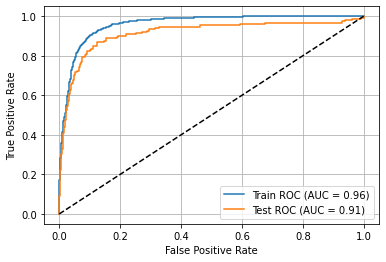

In [19]:
# refer :https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = logreg.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = logreg.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()





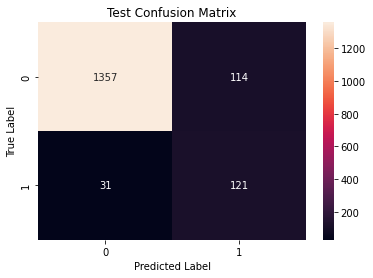

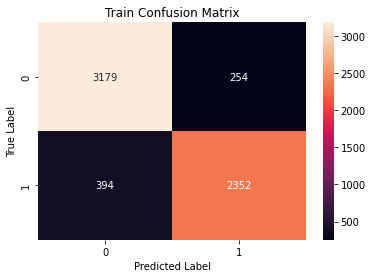

In [20]:
from sklearn.metrics import confusion_matrix

# Predict the labels of the test set
y_test_pred = logreg.predict(x_te)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_te, y_test_pred)

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

# Predict the labels of the training set
y_train_pred = logreg.predict(x_train_res)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_test_pred = logreg.predict(x_te)
precision = precision_score(y_te, y_test_pred)
recall = recall_score(y_te, y_test_pred)
cm = confusion_matrix(y_te, y_test_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:")
print(cm)

y_train_pred = logreg.predict(x_train_res)
precision = precision_score(y_train_res, y_train_pred)
recall = recall_score(y_train_res, y_train_pred)
cm = confusion_matrix(y_train_res, y_train_pred)

print("\nTrain Data:")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:")
print(cm)

Precision: 0.51
Recall: 0.80
Confusion Matrix:
[[1357  114]
 [  31  121]]

Train Data:
Precision: 0.90
Recall: 0.86
Confusion Matrix:
[[3179  254]
 [ 394 2352]]


# **TRAIN SVM**

In [26]:
# Define the parameter grid for the SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create an SVM object
svm = SVC(probability=True)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_res, y_train_res)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best parameters to make predictions on the test data
y_pred = grid_search.predict(x_te)

Best Parameters:  {'C': 10, 'kernel': 'rbf'}
Best Score:  0.8958275329637377


# compute f1 score 

In [27]:
# Compute the f1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.4f}".format(f1))


F1 score: 0.6323


In [28]:
from sklearn.metrics import roc_auc_score

y_pred_proba = grid_search.predict_proba(x_te)[:, 1]
roc_auc = roc_auc_score(y_te, y_pred_proba)
print("ROC AUC Score: {:.2f}".format(roc_auc))

ROC AUC Score: 0.89


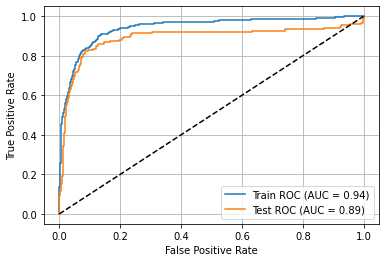

In [29]:
# refer : https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

# Compute the probabilities of class 1 for the test set
y_test_pred_proba = grid_search.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = grid_search.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

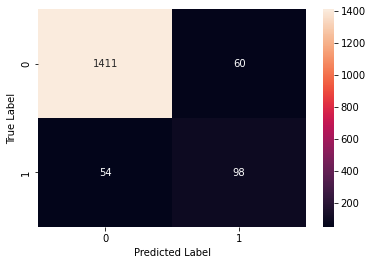

In [30]:
from sklearn.metrics import confusion_matrix

# Predict the labels of the test set
y_pred = grid_search.predict(x_te)

# Compute the confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Plot the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Train naive bias

In [31]:

# Define the parameter grid
param_grid = {}

# Create a Gaussian Naive Bayes object
nb = GaussianNB()

# Create a GridSearchCV object
grid_search_naive_bias = GridSearchCV(nb, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search_naive_bias.fit(x_train_res, y_train_res)

# Print the best parameters and best score

print("Best Score: ", grid_search_naive_bias.best_score_)

Best Score:  0.8531807734368853


In [32]:
# Compute the f1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.4f}".format(f1))

F1 score: 0.6323


In [33]:
from sklearn.metrics import roc_auc_score

y_pred_proba = grid_search_naive_bias.predict_proba(x_te)[:, 1]
roc_auc = roc_auc_score(y_te, y_pred_proba)
print("ROC AUC Score: {:.2f}".format(roc_auc))

ROC AUC Score: 0.88


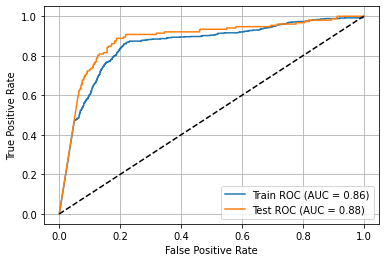

In [34]:
# refer : https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

# Compute the probabilities of class 1 for the test set
y_test_pred_proba = grid_search_naive_bias.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = grid_search_naive_bias.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train decision tree model

In [142]:
tree_parameters = {'max_depth': [1, 5, 10, 50],   # MAX DEPTH WE HAVE TAKEN 50
                  'min_samples_split': [5, 10, 100, 500]}   #  NUMBER OF min_samples_split 


decision_tree= DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(decision_tree, tree_parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(x_train_res,y_train_res)  

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [143]:

#HERE I M TRYING TO GET THE BEST VALUE FOR ALGO  
print('Best score: ',clf.best_score_)

# THE I M TRYING TO FINDOUT THAT WHAT SHOULD BE BEST VALUE FOR GBDT PARAMETERS VALUE 
print('Best Hyper parameters: ',clf.best_params_)

Best score:  0.9312982558649875
Best Hyper parameters:  {'max_depth': 5, 'min_samples_split': 500}


In [144]:
# Compute the F1-score
f1 = f1_score(y_te, y_pred)

# Print the F1-score
print("F1-score: ", f1)

F1-score:  0.6321525885558583


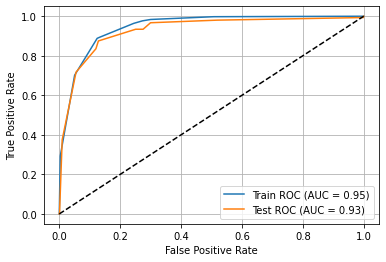

In [146]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Decision tree classifier with best parameters

In [38]:
decision_tree = DecisionTreeClassifier(max_depth=10 ,
                                       min_samples_split=500,
                                       class_weight='balanced')

decision_tree.fit(x_train_res, y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)

In [39]:
# Make predictions on the test set
y_pred = decision_tree.predict(x_te)

# Calculate the F1 score
f1 = f1_score(y_te, y_pred)
print("F1 Score: ", f1)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC Score: ", roc_auc)

F1 Score:  0.5265225933202358
ROC AUC Score:  0.8649906973415865


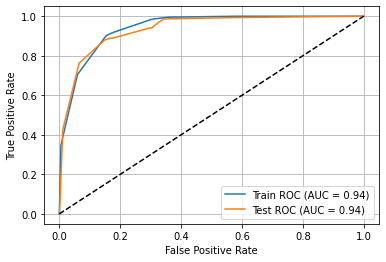

In [40]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = decision_tree.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = decision_tree.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


# Train random forest model

In [41]:
# refer : https://stackoverflow.com/questions/53782169/random-forest-tuning-with-randomizedsearchcv

from scipy.stats import randint as sp_randint

# Define the parameter grid for the RandomForestClassifier
param_grid = {
    'n_estimators': sp_randint(10, 100),  
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'max_features': ['auto', 'sqrt', None],
    'bootstrap': [True, False]
}

# Create an instance of the RandomForestClassifier 
rfc = RandomForestClassifier()

# Use Rando-mizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(rfc, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the data
random_search.fit(x_train_res, y_train_res)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 52}


In [42]:

#HERE I M TRYING TO GET THE BEST VALUE FOR ALGO  
print('Best score: ',random_search.best_score_) 

Best score:  0.9412750229979565


# now use this parameters to train the model


In [43]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto', 
                             min_samples_leaf=1, min_samples_split=4, n_estimators=52)

# Fit the model to the training data
rfc.fit(x_train_res, y_train_res)
y_pred = rfc.predict(x_te)

In [44]:

# Calculate the F1 score
f1 = f1_score(y_te, y_pred)
print("F1 Score: ", f1)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC Score: ", roc_auc)

F1 Score:  0.5878378378378378
ROC AUC Score:  0.766809635407349


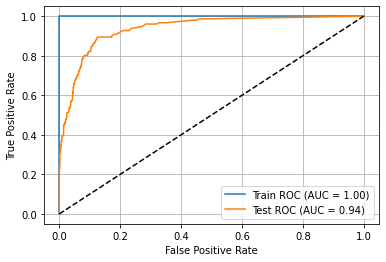

In [45]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = rfc.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = rfc.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


# Train xg boost 

In [148]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# create an instance of the XGBClassifier
xgb_clf = XGBClassifier()

# Define the parameter grid for the XGBClassifier
param_grid = {
    'n_estimators': sp_randint(10, 100),  
    'max_depth': sp_randint(1, 101),
    'min_child_weight': sp_randint(1, 11),
    'subsample': sp_uniform(0, 1),
    'colsample_bytree': sp_uniform(0, 1),
    'learning_rate': sp_uniform(0, 1),
    'gamma': sp_uniform(0, 1)
}

# Use Rando-mizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the data
random_search.fit(x_train_res, y_train_res)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'colsample_bytree': 0.575474177875879, 'gamma': 0.3881699262065219, 'learning_rate': 0.6432882184423532, 'max_depth': 33, 'min_child_weight': 3, 'n_estimators': 52, 'subsample': 0.9414648087765252}


In [151]:
xgb_clf = XGBClassifier(colsample_bytree=0.575474177875879, 
                            gamma=0.3881699262065219, 
                            learning_rate=0.6432882184423532, 
                            max_depth=33, 
                            min_child_weight=3, 
                            n_estimators=52, 
                            subsample=0.9414648087765252)

xgb_clf.fit(x_train_res, y_train_res)

y_pred_proba = xgb_clf.predict_proba(x_te)[:, 1]

print("AUC-ROC: ", roc_auc_score(y_te, y_pred_proba))
print("F1 Score: ", f1_score(y_te, y_pred))

AUC-ROC:  0.9296486457476116
F1 Score:  0.6321525885558583


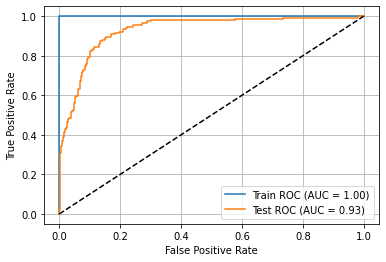

In [152]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = xgb_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = xgb_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# **now will use the dataset size 25:75**

In [46]:
# write the code for 75:25 ratio spilitting 

oversample = SMOTE(sampling_strategy=0.75 / (0.75 + 0.25), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 42.85% and Non-Fraud Percentage = 57.15%


# Train logestic regression

In [51]:

grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}

logreg = LogisticRegression(max_iter=10000)
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

logreg_cv.fit(x_train_res, y_train_res)

print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 1000.0, 'penalty': 'l2'}
roc_auc_score : 0.9529204548232999


In [52]:

#HERE I M TRYING TO GET THE BEST VALUE FOR ALGO  
print('Best score: ',logreg_cv.best_score_) 
y_pred = logreg_cv.predict(x_te)

Best score:  0.9529204548232999


**using best paramters**

In [55]:
# Fit the Logistic Regression model with best parameters
logreg_using_best_parameter = LogisticRegression(C=1000.0, penalty='l2', max_iter=10000)
logreg_using_best_parameter.fit(x_train_res, y_train_res)

# Predict the target values using the fitted model
y_pred = logreg_using_best_parameter.predict(x_te)

# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = logreg_using_best_parameter.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.62
AUC-ROC score: 0.89


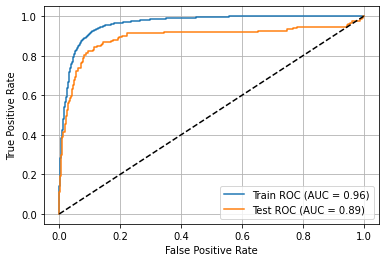

In [56]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = logreg_using_best_parameter.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = logreg_using_best_parameter.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train naive bias 

In [57]:

# Define the parameter grid
param_grid = {}

# Create a Gaussian Naive Bayes object
nb = GaussianNB()

# Create a GridSearchCV object
grid_search_naive_bias = GridSearchCV(nb, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search_naive_bias.fit(x_train_res, y_train_res)

# Print the best parameters and best score

print("Best Score: ", grid_search_naive_bias.best_score_)

Best Score:  0.7484601711552076


In [58]:

#HERE I M TRYING TO GET THE BEST VALUE FOR ALGO  
print('Best score: ',grid_search_naive_bias.best_score_) 
y_pred = grid_search_naive_bias.predict(x_te)

Best score:  0.7484601711552076


In [59]:
# Calculate the F1 score
f1 = f1_score(y_te, y_pred)
print("F1 Score: ", f1)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC Score: ", roc_auc)

F1 Score:  0.5449101796407185
ROC AUC Score:  0.768410766038141


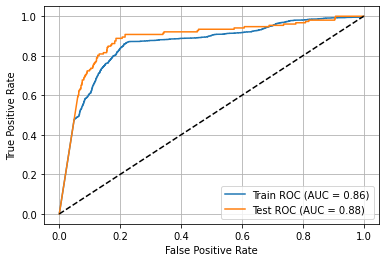

In [60]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = grid_search_naive_bias.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = grid_search_naive_bias.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train decision tree model

In [61]:
decision_tree = DecisionTreeClassifier(max_depth=10 ,
                                       min_samples_split=500,
                                       class_weight='balanced')

decision_tree.fit(x_train_res, y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)

In [62]:
# Make predictions on the test set
y_pred = decision_tree.predict(x_te)

# Calculate the F1 score
f1 = f1_score(y_te, y_pred)
print("F1 Score: ", f1)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_te, y_pred)
print("ROC AUC Score: ", roc_auc)

F1 Score:  0.5221052631578946
ROC AUC Score:  0.8402536763390461


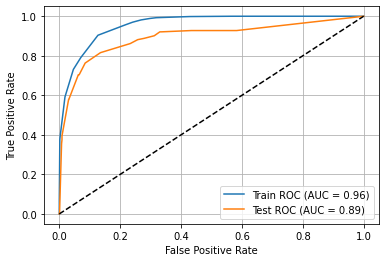

In [63]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = decision_tree.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = decision_tree.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [64]:
# Fit the KNN model with best parameters
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(x_train_res, y_train_res)

# Predict the target values using the fitted model
y_pred = knn.predict(x_te)

# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = knn.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.50
AUC-ROC score: 0.87


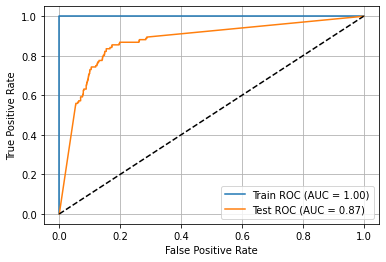

In [65]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = knn.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = knn.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train svm

In [66]:
# Define the parameter grid for the SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create an SVM object
svm = SVC(probability=True)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_res, y_train_res)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best parameters to make predictions on the test data
y_pred = grid_search.predict(x_te)

Best Parameters:  {'C': 10, 'kernel': 'linear'}
Best Score:  0.8872996850932597


In [67]:
# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = grid_search.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)

F1 score: 0.59


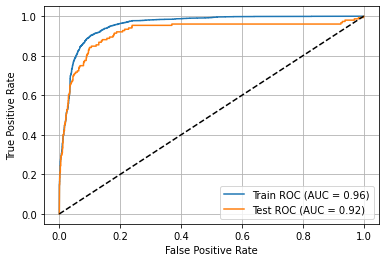

In [68]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = grid_search.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = grid_search.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train model with ratio of 65:35

In [132]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE(sampling_strategy=0.65 / (0.65 + 0.35), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 39.39% and Non-Fraud Percentage = 60.61%


#Train logestic regression

In [133]:
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}

logreg = LogisticRegression(max_iter=10000)
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

logreg_cv.fit(x_train_res, y_train_res)

print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 1000.0, 'penalty': 'l2'}
roc_auc_score : 0.9501073827498339


In [134]:
# Predict the target values using the fitted model
y_pred = logreg_cv.predict(x_te)

# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = logreg_cv.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.63
AUC-ROC score: 0.89


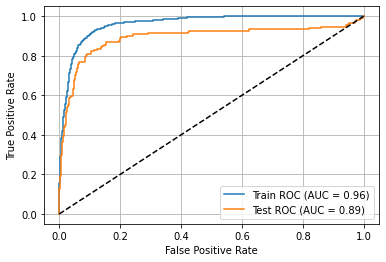

In [135]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = logreg_cv.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = logreg_cv.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train svm

In [82]:
# Define the parameter grid for the SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create an SVM object
svm = SVC(probability=True)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_res, y_train_res)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best parameters to make predictions on the test data
y_pred = grid_search.predict(x_te)

Best Parameters:  {'C': 10, 'kernel': 'linear'}
Best Score:  0.8887688334856334


In [83]:
# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = grid_search.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)

F1 score: 0.60


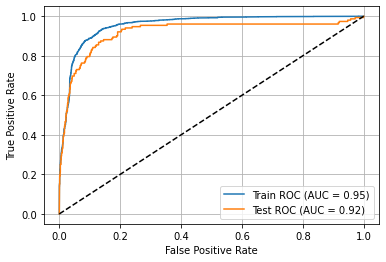

In [84]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = grid_search.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = grid_search.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train xgboost

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# create an instance of the XGBClassifier
xgb_clf = XGBClassifier()

# Define the parameter grid for the XGBClassifier
param_grid = {
    'n_estimators': sp_randint(10, 100),  
    'max_depth': sp_randint(1, 101),
    'min_child_weight': sp_randint(1, 11),
    'subsample': sp_uniform(0, 1),
    'colsample_bytree': sp_uniform(0, 1),
    'learning_rate': sp_uniform(0, 1),
    'gamma': sp_uniform(0, 1)
}

# Use Rando-mizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the data
random_search.fit(x_train_res, y_train_res)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'colsample_bytree': 0.28093450968738076, 'gamma': 0.5426960831582485, 'learning_rate': 0.14092422497476265, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 98, 'subsample': 0.9868869366005173}


In [88]:
xgb_clf = XGBClassifier(colsample_bytree=0.28093450968738076, 
                            gamma=0.5426960831582485, 
                            learning_rate=0.14092422497476265, 
                            max_depth=15, 
                            min_child_weight=1, 
                            n_estimators=98, 
                            subsample=0.9868869366005173)

xgb_clf.fit(x_train_res, y_train_res)

y_pred_proba = xgb_clf.predict_proba(x_te)[:, 1]

print("AUC-ROC: ", roc_auc_score(y_te, y_pred_proba))
print("F1 Score: ", f1_score(y_te, y_pred))

AUC-ROC:  0.9367016709005689
F1 Score:  0.597938144329897


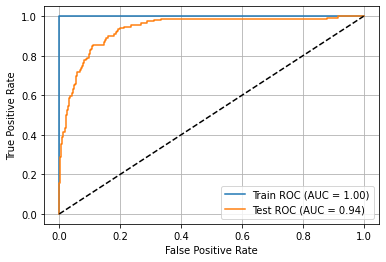

In [89]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = xgb_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = xgb_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# now will try ratio 60:40

In [136]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE(sampling_strategy=0.60 / (0.60 + 0.40), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 37.49% and Non-Fraud Percentage = 62.51%


# Train logestic regression 

In [137]:
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}

logreg = LogisticRegression(max_iter=10000)
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

logreg_cv.fit(x_train_res, y_train_res)

print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 1000.0, 'penalty': 'l2'}
roc_auc_score : 0.9515035931320852


In [138]:
# Initialize the logistic regression model with the best parameters
logreg = LogisticRegression(solver='liblinear', C=1000.0, penalty='l2')

# Fit the model to the training data
logreg.fit(x_train_res, y_train_res)

LogisticRegression(C=1000.0, solver='liblinear')

In [139]:
# Predict the target values using the fitted model
y_pred = logreg.predict(x_te)

# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = logreg.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.63
AUC-ROC score: 0.89


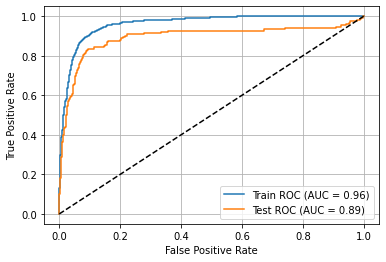

In [140]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = logreg.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = logreg.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train svm

In [95]:
# Define the parameter grid for the SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create an SVM object
svm = SVC(probability=True)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_res, y_train_res)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Use the best parameters to make predictions on the test data
y_pred = grid_search.predict(x_te)

Best Parameters:  {'C': 10, 'kernel': 'linear'}
Best Score:  0.8883855334622798


In [96]:


# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = grid_search.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.61
AUC-ROC score: 0.92


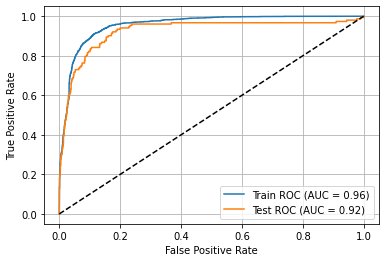

In [97]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = grid_search.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = grid_search.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train knn

In [98]:
# Fit the KNN model with best parameters
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(x_train_res, y_train_res)

# Predict the target values using the fitted model
y_pred = knn.predict(x_te)

# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = knn.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.51
AUC-ROC score: 0.88


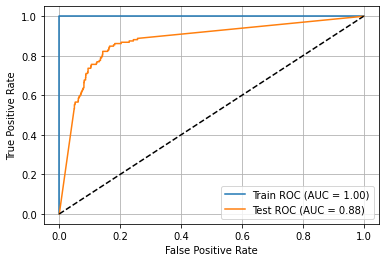

In [99]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = knn.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = knn.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [100]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# create an instance of the XGBClassifier
xgb_clf = XGBClassifier()

# Define the parameter grid for the XGBClassifier
param_grid = {
    'n_estimators': sp_randint(10, 100),  
    'max_depth': sp_randint(1, 101),
    'min_child_weight': sp_randint(1, 11),
    'subsample': sp_uniform(0, 1),
    'colsample_bytree': sp_uniform(0, 1),
    'learning_rate': sp_uniform(0, 1),
    'gamma': sp_uniform(0, 1)
}

# Use Rando-mizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the data
random_search.fit(x_train_res, y_train_res)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'colsample_bytree': 0.8324426408004217, 'gamma': 0.21233911067827616, 'learning_rate': 0.18182496720710062, 'max_depth': 21, 'min_child_weight': 1, 'n_estimators': 85, 'subsample': 0.6116531604882809}


In [102]:
xgb_clf = XGBClassifier(colsample_bytree=0.8324426408004217, 
                            gamma=0.21233911067827616, 
                            learning_rate=0.18182496720710062, 
                            max_depth=21, 
                            min_child_weight=1, 
                            n_estimators=85, 
                            subsample=0.6116531604882809)

xgb_clf.fit(x_train_res, y_train_res)

y_pred_proba = xgb_clf.predict_proba(x_te)[:, 1]

print("AUC-ROC: ", roc_auc_score(y_te, y_pred_proba))
print("F1 Score: ", f1_score(y_te, y_pred))

AUC-ROC:  0.9333249847937315
F1 Score:  0.5133470225872689


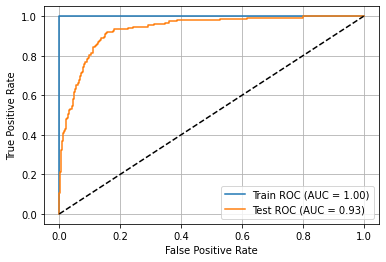

In [103]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = xgb_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = xgb_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# use 50:50 ratio 

In [199]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE(sampling_strategy=0.50 / (0.50 + 0.50), random_state=42)
x_train_res, y_train_res = oversample.fit_resample(x_trai, y_trai)
counter = Counter(y_train_res)
fraud_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_fraud_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(fraud_percentage, non_fraud_percentage))

Fraud Percentage = 33.33% and Non-Fraud Percentage = 66.67%


# Train logestic regresssion 

In [105]:
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}

logreg = LogisticRegression(max_iter=10000)
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)

logreg_cv.fit(x_train_res, y_train_res)

print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 1000.0, 'penalty': 'l2'}
roc_auc_score : 0.9495558790298257


In [106]:
# Initialize the logistic regression model with the best parameters
logreg = LogisticRegression(solver='liblinear', C=1000.0, penalty='l2')

# Fit the model to the training data
logreg.fit(x_train_res, y_train_res)

LogisticRegression(C=1000.0, solver='liblinear')

In [107]:
# Predict the target values using the fitted model
y_pred = logreg.predict(x_te)

# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = logreg.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.65
AUC-ROC score: 0.90


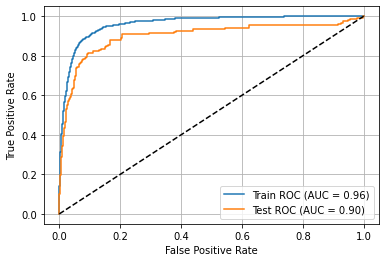

In [108]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = logreg.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = logreg.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train logestic regression with random search

In [109]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}

logreg = LogisticRegression(max_iter=10000)
random_search_logreg = RandomizedSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)


logreg_cv.fit(x_train_res, y_train_res)

print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 1000.0, 'penalty': 'l2'}
roc_auc_score : 0.9495558790298257


In [110]:
# Initialize the logistic regression model with the best parameters
logreg = LogisticRegression(solver='liblinear', C=1000.0, penalty='l2')

# Fit the model to the training data
logreg.fit(x_train_res, y_train_res)

LogisticRegression(C=1000.0, solver='liblinear')

In [111]:
# Predict the target values using the fitted model
y_pred = logreg.predict(x_te)

# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = logreg.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.65
AUC-ROC score: 0.90


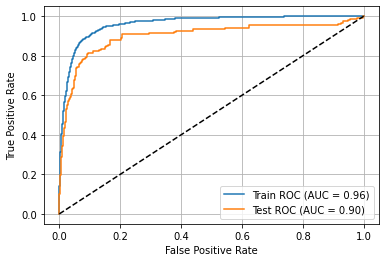

In [112]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = logreg.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = logreg.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train svm algo with random search cv

In [113]:
# Define the parameter grid for the SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create an SVM object
svm = SVC(probability=True)

# Create a GridSearchCV object
random_search_svm = RandomizedSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
random_search_svm.fit(x_train_res, y_train_res)

# Print the best parameters and the best score
print("Best Parameters: ", random_search_svm.best_params_)
print("Best Score: ", random_search_svm.best_score_)

# Use the best parameters to make predictions on the test data
y_pred = random_search_svm.predict(x_te)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters:  {'kernel': 'linear', 'C': 10}
Best Score:  0.8892994423844435


In [114]:
# Calculate F1 score
f1 = f1_score(y_te, y_pred)
print("F1 score: {:.2f}".format(f1))

# Calculate AUC-ROC score
y_pred_prob = random_search_svm.predict_proba(x_te)[:, 1]
auc_roc = roc_auc_score(y_te, y_pred_prob)
print("AUC-ROC score: {:.2f}".format(auc_roc))

F1 score: 0.63
AUC-ROC score: 0.93


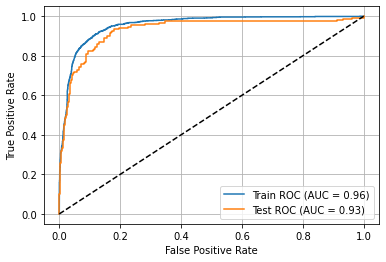

In [115]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = random_search_svm.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = random_search_svm.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train xgboost

In [116]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# create an instance of the XGBClassifier
xgb_clf = XGBClassifier()

# Define the parameter grid for the XGBClassifier
param_grid = {
    'n_estimators': sp_randint(10, 100),  
    'max_depth': sp_randint(1, 101),
    'min_child_weight': sp_randint(1, 11),
    'subsample': sp_uniform(0, 1),
    'colsample_bytree': sp_uniform(0, 1),
    'learning_rate': sp_uniform(0, 1),
    'gamma': sp_uniform(0, 1)
}

# Use Rando-mizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the data
random_search.fit(x_train_res, y_train_res)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'colsample_bytree': 0.28093450968738076, 'gamma': 0.5426960831582485, 'learning_rate': 0.14092422497476265, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 98, 'subsample': 0.9868869366005173}


In [117]:
xgb_clf = XGBClassifier(colsample_bytree=0.28093450968738076, 
                            gamma=0.5426960831582485, 
                            learning_rate=0.14092422497476265, 
                            max_depth=15, 
                            min_child_weight=1, 
                            n_estimators=98, 
                            subsample=0.9868869366005173)

xgb_clf.fit(x_train_res, y_train_res)

y_pred_proba = xgb_clf.predict_proba(x_te)[:, 1]

print("AUC-ROC: ", roc_auc_score(y_te, y_pred_proba))
print("F1 Score: ", f1_score(y_te, y_pred))

AUC-ROC:  0.9377303302443736
F1 Score:  0.6260387811634349


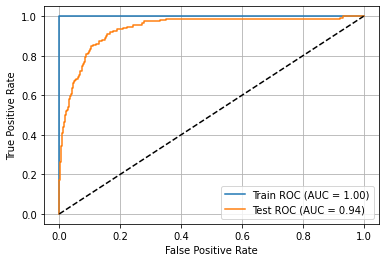

In [118]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = xgb_clf.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = xgb_clf.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Train random forest

In [119]:
from scipy.stats import randint as sp_randint

# Define the parameter grid for the RandomForestClassifier
param_grid = {
    'n_estimators': sp_randint(10, 100),  
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'max_features': ['auto', 'sqrt', None],
    'bootstrap': [True, False]
}

# Create an instance of the RandomForestClassifier 
rfc = RandomForestClassifier()

# Use Rando-mizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(rfc, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV model to the data
random_search.fit(x_train_res, y_train_res)

# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 33}


In [200]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=40, max_features='auto', 
                             min_samples_leaf=2, min_samples_split=6, n_estimators=33)

# Fit the model to the training data
rfc.fit(x_train_res, y_train_res)
y_pred = rfc.predict(x_te)

In [201]:
y_pred_proba = rfc.predict_proba(x_te)[:, 1]

print("AUC-ROC: ", roc_auc_score(y_te, y_pred_proba))
print("F1 Score: ", f1_score(y_te, y_pred))

AUC-ROC:  0.9392263587248202
F1 Score:  0.6226415094339622


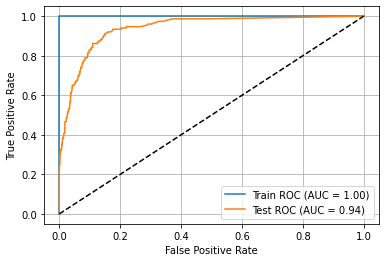

In [202]:
# Compute the probabilities of class 1 for the test set
y_test_pred_proba = rfc.predict_proba(x_te)[:,1]

# Compute the probabilities of class 1 for the training set
y_train_pred_proba = rfc.predict_proba(x_train_res)[:,1]

# Compute the ROC AUC for the test set
fpr_test, tpr_test, _ = roc_curve(y_te, y_test_pred_proba)
auc_test = roc_auc_score(y_te, y_test_pred_proba)

# Compute the ROC AUC for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_pred_proba)
auc_train = roc_auc_score(y_train_res, y_train_pred_proba)

# Plot the ROC curve for the training set
plt.plot(fpr_train, tpr_train, label='Train ROC (AUC = {:.2f})'.format(auc_train))

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, label='Test ROC (AUC = {:.2f})'.format(auc_test))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

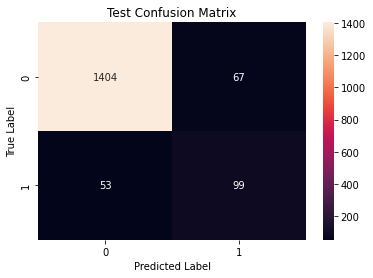

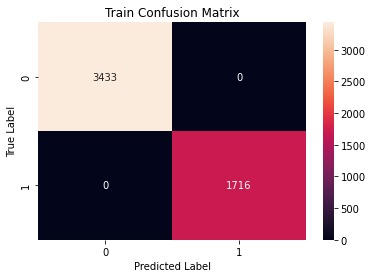

In [204]:
from sklearn.metrics import confusion_matrix

# Predict the labels of the test set
y_test_pred = rfc.predict(x_te)

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_te, y_test_pred)

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

# Predict the labels of the training set
y_train_pred = rfc.predict(x_train_res)

# Compute the confusion matrix for the training set
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Train Confusion Matrix')
plt.show()

In [206]:
y_test_pred = rfc.predict(x_te)
precision = precision_score(y_te, y_test_pred)
recall = recall_score(y_te, y_test_pred)
cm = confusion_matrix(y_te, y_test_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:")
print(cm)

y_train_pred = rfc.predict(x_train_res)
precision = precision_score(y_train_res, y_train_pred)
recall = recall_score(y_train_res, y_train_pred)
cm = confusion_matrix(y_train_res, y_train_pred)

print("\nTrain Data:")
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:")
print(cm)






Precision: 0.60
Recall: 0.65
Confusion Matrix:
[[1404   67]
 [  53   99]]

Train Data:
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[3433    0]
 [   0 1716]]


# As we have seen that we have got the precision is low and recall is high so our models are getting overfitting

# **NOW WILL ANALYZE THE PERFORMENCE OF ALL MODELS**

In [168]:
from prettytable import PrettyTable
# refer: https://ptable.readthedocs.io/en/latest/tutorial.html
# http://zetcode.com/python/prettytable/


# here we are using the pretty table to show our model performence 
print("THIS IS LOGESTIC REGRESSION MODEL PERFORMENCE IN ALL COMBINATIONS")
table=PrettyTable()
table.field_names = [ "SI.N0","MODEL", "SPLIT_RATIO", "F1_SCORE", "AUC_ROC_SCORE","TRAIN AUC SCORE"," TEST AUC SCORE "]
table.add_row([1,"LOGESTIC REGRESSION ", "80:20", 0.6379 ,0.94,  0.95, 0.93])
table.add_row([2,"LOGESTIC REGRESSION ", "75:25", 0.62 ,0.89,  0.96, 0.89])
table.add_row([3,"LOGESTIC REGRESSION ", "65:35", 0.63 ,0.9501 ,0.96, 0.89])
table.add_row([4,"LOGESTIC REGRESSION ", "60:40", 0.63 ,0.9515, 0.96,0.89])
table.add_row([5,"LOGESTIC REGRESSION ", "50:50", 0.65 ,0.949, 0.96,0.90])
table.border = True
table.header = True
table.header_style = "upper"


print(table)



print("*********************************************************************************")
print("THIS IS SVM MODEL PERFOEMENCE WITH ALL COMBINATIONS")
table=PrettyTable()
table.field_names = [ "SI.N0","MODEL", "SPLIT_RATIO", "F1_SCORE", "AUC_ROC_SCORE","TRAIN AUC SCORE"," TEST AUC SCORE "]
table.add_row([1,"SVM ", "80:20", 0.6323,0.89,    0.94,0.89])
table.add_row([2,"SVM ", "75:25", 0.59,0.887,   0.96,0.92])
table.add_row([3,"SVM ", "65:35", 0.60,  0.8876,  0.95,0.92])
table.add_row([4,"SVM ", "60:40", 0.61,0.8883 ,  0.96,0.92])
table.add_row([5,"SVM ", "50:50", 0.63,889 , 0.96,0.93])
table.border = True
table.header = True
table.header_style = "upper"

print(table)

print("*************************************************************************************")
print("THIS IS DECISION TREE MODEL PERFORMENCE WITH DIFFERENT COMBINATION ")
table=PrettyTable()
table.field_names = [ "SI.N0","MODEL", "SPLIT_RATIO", "F1_SCORE", "AUC_ROC_SCORE","TRAIN AUC SCORE"," TEST AUC SCORE "]
table.add_row([1,"D.T ", "80:20", 0.6325,0.9330,    0.95,0.93])
table.add_row([2,"D.T_BEST_PARAMETES ", "80:20", 0.5262,0.86499,   0.94,0.94])
table.add_row([3,"D.T ", "75:25", 0.522105,  0.8402,  0.96,0.89])
table.border = True
table.header = True
table.header_style = "upper"

print(table)

print("*************************************************************************************")
print("THIS IS NAIVE BIAS AND KNN  MODEL PERFORMENCE WITH DIFFERENT COMBINATION ")
table=PrettyTable()
table.field_names = [ "SI.N0","MODEL", "SPLIT_RATIO", "F1_SCORE", "AUC_ROC_SCORE","TRAIN AUC SCORE"," TEST AUC SCORE "]
table.add_row([1,"NAIVE BIAS ", "80:20", 0.6323,0.86,    0.95,0.88])
table.add_row([2,"NAIVE BIAS ", "75:25", 0.544,0.86,   0.94,0.88])
table.add_row([3,"KNN", "60:40", 0.51,  0.8402,  1.00,0.88])
table.border = True
table.header = True
table.header_style = "upper"

print(table)
print("*************************************************************************************")

print("THIS IS RANDOM FOREST  MODEL PERFORMENCE WITH DIFFERENT COMBINATION ")
table=PrettyTable()
table.field_names = [ "SI.N0","MODEL", "SPLIT_RATIO", "F1_SCORE", "AUC_ROC_SCORE","TRAIN AUC SCORE"," TEST AUC SCORE "]
table.add_row([1,"RANDOM FOREST  ", "80:20", 0.6323,0.7668,    1.00,0.94])
table.add_row([2,"RANDOM FOREST  ", "50:50", 0.62928,0.9291,   1.00,0.93])
table.border = True
table.header = True
table.header_style = "upper"

print(table)

print("*********************************************************************************")
print("THIS IS XG BOOST MODEL PERFOEMENCE WITH ALL COMBINATIONS")
table=PrettyTable()
table.field_names = [ "SI.N0","MODEL", "SPLIT_RATIO", "F1_SCORE", "AUC_ROC_SCORE","TRAIN AUC SCORE"," TEST AUC SCORE "]
table.add_row([1,"XG BOOST ", "80:20", 0.6321,0.9296,    1.00,0.93])
table.add_row([2,"XG BOOST ", "65:35", 0.59,0.93,   1.00,0.94])
table.add_row([3,"XG BOOST ", "60:40", 0.5133,  0.93332,  1.00,0.93])
table.add_row([4,"XG BOOST ", "50:50", 0.6260,0.9377 ,  1.00,0.93])
table.border = True
table.header = True
table.header_style = "upper"

print(table)












THIS IS LOGESTIC REGRESSION MODEL PERFORMENCE IN ALL COMBINATIONS
+-------+----------------------+-------------+----------+---------------+-----------------+------------------+
| SI.N0 |        MODEL         | SPLIT_RATIO | F1_SCORE | AUC_ROC_SCORE | TRAIN AUC SCORE |  TEST AUC SCORE  |
+-------+----------------------+-------------+----------+---------------+-----------------+------------------+
|   1   | LOGESTIC REGRESSION  |    80:20    |  0.6379  |      0.94     |       0.95      |       0.93       |
|   2   | LOGESTIC REGRESSION  |    75:25    |   0.62   |      0.89     |       0.96      |       0.89       |
|   3   | LOGESTIC REGRESSION  |    65:35    |   0.63   |     0.9501    |       0.96      |       0.89       |
|   4   | LOGESTIC REGRESSION  |    60:40    |   0.63   |     0.9515    |       0.96      |       0.89       |
|   5   | LOGESTIC REGRESSION  |    50:50    |   0.65   |     0.949     |       0.96      |       0.9        |
+-------+----------------------+-------------+

# **OBSERVATION**

**1.SINCE THIS IS MY FIRST CUT APPROCH FOR THE MODELING**
**2. THE MOTO OF MY THIS FIRST CUT APPROCH APPROCH IS SINCE THIS IS HIGHLY IMBALANCD DATA SO AS WE HAVE RESEARCED THAT WILL USE SMOTE TECHNIQUE WITH OVERSAMPLING**

**3. SO I HAVE BEEN ALL THE POSSIBLE COMBINATION OF DATASET RATIO USING SMOTE TECHNQUE**

**4. I HAVE BEEN TREID MODELS LIKE LOGESTIC REGRESSION, SVM WITH GRID SEARCH, KNN, NAIVE BIAS, RANDOM FOREST WITH HYPERPARAMETER TUNNING , XGBOOST WITH HYPERPARAMETER TUNNING WITH THE DATASET COMBINATION FOR OVERSAMPLING FOR 80:20,75:25,65:35,60:40,50:50 WITH THESE ALL THE MODELS**

**5.SINCE WE CAN OBSERVE THAT 80:20 COMBINATION WITH SMOTE OVERSAMPLING PERFORMIG BETTER THAN OTHER COMBINATIONS**

**6. INTENTIONALLY I HAVE NOT TRIED THE ENSEMBLE TECHNIQUE SINCE THIS IS FIRST CUT APPROACH**

**7. I HAVE OBSERVE LOGESTIC REGRESSION , SVM , RANDOM FOREST PERFORMING BETTER THAN OTHER MODEL**


# **CONCLUSION**

**1. I HAVE CONCLUDED THAT WE HAVE TO USE THE ENSEMBLE TECHNIQUE FOR GETTING BETTER RESULT**

**2. I THINK 80:20 SPLIT IS PERFORMING WELL WITH SMOTE OVERSAMPLING THAT I WILL USE AS DATASET COMBINATION in future in this case study**

**3.I THINK WE HAVE TO GO WITH ENSEMBLE TECHNIQUES AND IN THE ENSEMBLE TECHNIQUES I WILL USE LOGESTIC REGRESSION , SVM , RANDOM FOREST, XG BOOST AS BASE LERNERS  TO GET BETTER RESULT**

#4. THIS IS PERFORMENCE OF LOGESTIC REGRESSION 
Precision: 0.53
Recall: 0.80
Confusion Matrix:
[[1363  108]
 [  30  122]]

Train Data:
Precision: 0.90
Recall: 0.83
Confusion Matrix:
[[3177  256]
 [ 455 2291]]**

 **precision is moderate but recall is not good since this is claim fraud detection problem**

**and we have research in the starting that false negative and false positive should as low as possible**

#**but this is still making aroung model is overfitting  precision is low for train but for test is high **


 # so i think i have to go with ensemble technique with these models as base learners